# Assignment 2
* In this assignment you will be working with three data files from iMDB:
    * cast.csv
    * release_dates.csv
    * titles.csv
* Using the appropriate file(s), answer the following questions
* Some questions can be completed with one-liners while others are a bit more involved
* Where appropriate, answers should also provide brief commentary
* Exclude data that doen't make senss, i.e. data from the future
* Once complete upload this notebook to your classwork Github repo and post the link on Canvas 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

cast = pd.read_csv("cast.csv")
release = pd.read_csv("release_dates.csv")
titles = pd.read_csv("titles.csv")

# removing future years
cast = cast[cast["year"] <= 2025]
titles = titles[titles["year"] <= 2025]
release["date"] = pd.to_datetime(release["date"], errors="coerce")
release = release[release["date"] <= "2025-12-31"]


### 1. Conduct a high level assessment of the three data files, i.e. how many records are there, what kind of data, etc. Summarize your findings with annotation. 

In [5]:
# Number of rows and columns
print("Cast file shape:", cast.shape)
print("Release file shape:", release.shape)
print("Titles file shape:", titles.shape)

# First few rows of each to understand what kind of data they have
print("\n--- Cast sample ---")
print(cast.head())

print("\n--- Release sample ---")
print(release.head())

print("\n--- Titles sample ---")
print(titles.head())

# Data types in other columns
print("\n--- Data types ---")
print("Cast:\n", cast.dtypes)
print("\nRelease:\n", release.dtypes)
print("\nTitles:\n", titles.dtypes)


Cast file shape: (3442899, 6)
Release file shape: (443485, 4)
Titles file shape: (226011, 2)

--- Cast sample ---
                  title  year      name   type                character     n
0        Closet Monster  2015  Buffy #1  actor                  Buffy 4  31.0
1       Suuri illusioni  1985    Homo $  actor                   Guests  22.0
2   Battle of the Sexes  2017   $hutter  actor          Bobby Riggs Fan  10.0
3  Secret in Their Eyes  2015   $hutter  actor          2002 Dodger Fan   NaN
4            Steve Jobs  2015   $hutter  actor  1988 Opera House Patron   NaN

--- Release sample ---
                    title  year      country       date
0   #73, Shaanthi Nivaasa  2007        India 2007-06-15
1                   #BKKY  2016     Cambodia 2017-10-12
2                 #Beings  2015      Romania 2015-01-29
3               #Captured  2017          USA 2017-09-05
4  #Ewankosau saranghaeyo  2015  Philippines 2015-01-21

--- Titles sample ---
                      title  year
0

Findings:

1. cast.csv: contains about 3.4 million rows and 6 columns. Key columns are title, year, name, type (actor/actress), character, and n (ranking/order of appearance).

2. release_dates.csv: This file describes who appeared in each movie and their role type. It contains around 440 k rows and 4 columns liek title, year, country, and date.

3. #titles.csv: It shows when and where each movie was released, and has about 226 k rows and 2 columns (title, year). Each record represents a unique movie title and its release year.

Observations:

Some columns (like n or date) have missing values. The data types are mostly object (text) and numeric for years or rankings. Together these three files describe:
what films exist (titles.csv),
when they were released (release_dates.csv),
and who was in them (cast.csv).


### 2. How many movies have the title North by Northwest

In [13]:
titles[titles["title"].str.lower() == "north by northwest".lower()].shape[0]
#Only one movie has the title North by Northwest

1

### 3. How many version of Hamlet are there, when was the first made? the last?

In [17]:
ham = titles[titles["title"].str.lower() == "hamlet"]
print("Count:", len(ham))
print("First:", ham["year"].min(), "Last:", ham["year"].max())
#There are 20 versions of Hamlet, the first one was made in 1910 and the last one was made in 2017

Count: 20
First: 1910 Last: 2017


### 4. List all the movies called Treasure Island from oldest to newest

In [19]:
titles[titles["title"].str.lower() == "treasure island"].sort_values("year")

,title,year
180911,Treasure Island,1918
108853,Treasure Island,1920
87953,Treasure Island,1934
126321,Treasure Island,1950
190233,Treasure Island,1972
122150,Treasure Island,1973
52099,Treasure Island,1985
36752,Treasure Island,1999


### 5. How many movies were made in 1950? 1980? 2000? What conclusions can you draw from these data points?

In [25]:
for year in [1950, 1980, 2000]:
    count = len(titles[titles["year"] == year])
    print(f"Movies made in {year}: {count}")
#Movies made in 1950: 1109
#Movies made in 1980: 1750
#Movies made in 2000: 2568
#There is an upward trend in the number of movies produced. The number of films doubled from 1950 to 1980 and continued to grow by 2000.
#This shows expansion of the global film industry and how movie production has grown consistently with population, demand, and new markets over time.

Movies made in 1950: 1109
Movies made in 1980: 1750
Movies made in 2000: 2568


### 6. How big was the cast of Metropolis


In [27]:
met = cast[cast["title"].str.lower() == "metropolis"]
print("Total cast:", len(met))
met.groupby("year").size()
#there were 33 cast members in the movie Metropolis

Total cast: 33


year
1927    33
dtype: int64

### 7. How many roles for actors were there 1950's? 1990's

In [31]:
a50 = len(cast[(cast["type"]=="actor") & (cast["year"].between(1950,1959))])
a90 = len(cast[(cast["type"]=="actor") & (cast["year"].between(1990,1999))])
print("1950s:", a50, "1990s:", a90)
#in 1950's there were 153559 roles for actors and in 1990's there were 245713.

1950s: 153559 1990s: 245713


### 8. How many roles for actors & actresses over time? Output should be a line graph

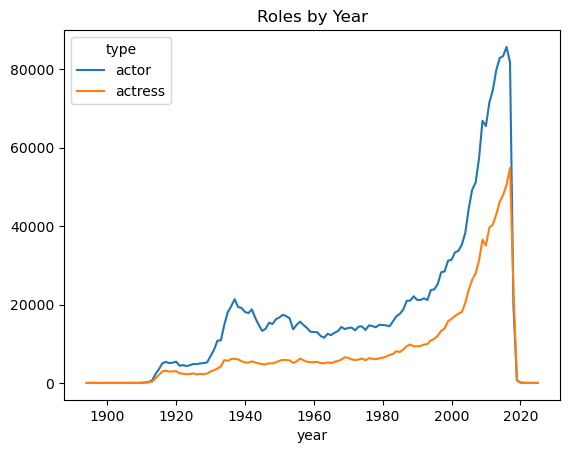

In [33]:
df = cast[cast["type"].isin(["actor","actress"])]
roles = df.groupby(["year","type"]).size().unstack(fill_value=0)
roles.plot(title="Roles by Year")
plt.show()

### 9. How many "leading roles" were there in the 2000's?

In [35]:
len(cast[(cast["year"].between(2000,2009)) & (cast["n"]==1)])
#there were 23593 leadin roels in 2000s

23593

### 10. How many roles received no ranking in the 2000's? 1950's. What conclusions can you draw from these two data points?

In [41]:
n2000 = len(cast[(cast["year"].between(2000,2009)) & (cast["n"].isna())])
n1950 = len(cast[(cast["year"].between(1950,1959)) & (cast["n"].isna())])
print("2000s:", n2000, "1950s:", n1950)
#In 2000s there were 232037 roles that recieved no ranking and in 1950s there were 95406 roles that recieved no ranking.
#The number of roles without a ranking (n missing) is much higher in the 2000s than in the 1950s.
#This could reflect massive growth in the film industry like independent and short productions where detailed cast rankings aren’t always provided, so many roles were uncredited or unranked leading to more missing n values.

2000s: 232037 1950s: 95406


### 11. Plot the number of films made in each decade

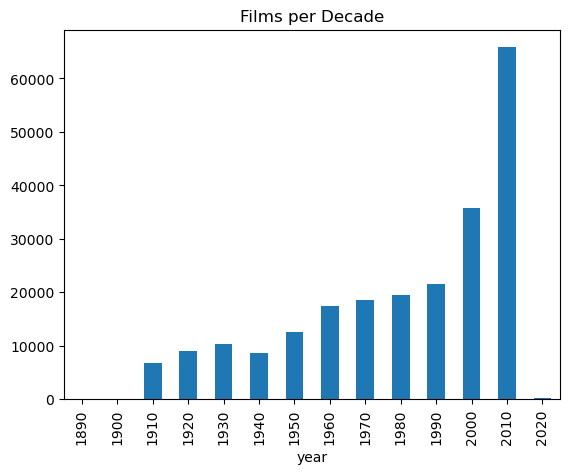

In [43]:
titles.groupby(titles["year"]//10*10).size().plot(kind="bar", title="Films per Decade")
plt.show()

### 12. Plot the number of films with a Rustler character over time

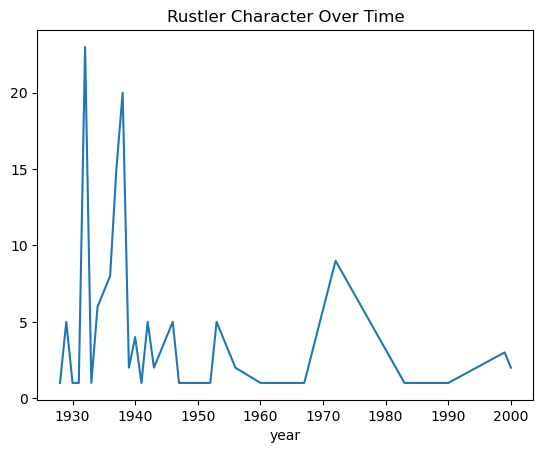

In [45]:
r = cast[cast["character"].str.lower() == "rustler"].groupby("year").size()
r.plot(title="Rustler Character Over Time")
plt.show()

### 13. What are the top ten character names of all time?

In [47]:
cast["character"].value_counts().head(10)

character
Himself        19637
Dancer         12019
Extra          10848
Reporter        7818
Doctor          6963
Party Guest     6786
Student         6631
Policeman       6424
Bartender       6290
Herself         6269
Name: count, dtype: int64

### 14. Which actor appeared in the most films in the 1990's decade?

In [49]:
c90 = cast[(cast["year"].between(1990,1999)) & (cast["type"].isin(["actor","actress"]))]
c90["name"].value_counts().head(1) 
#Shakti Kapoor was the acror who appreared in the most films in the 1990's decade, with a total of 143 movies

name
Shakti Kapoor    143
Name: count, dtype: int64

### 15. What are the top 10 roles that start with Science?

In [53]:
cast.loc[cast["character"].fillna("").str.lower().str.startswith("science"), "character"] \
    .value_counts().head(10)

character
Science Teacher         57
Science Fair Student     9
Science Student          6
Science Fair Judge       6
Science Fair Kid         5
Science Reporter         5
Science Kid              5
Science                  4
Science Fair Teacher     3
Science Officer          3
Name: count, dtype: int64

### 16. What film has the largest cast

In [55]:
cast.groupby(["title","year"]).size().sort_values(ascending=False).head(1)
# film "Around the World in 80 Days" has the most cast members- 1299

title                        year
Around the World in 80 Days  1956    1299
dtype: int64

### 17. Generate descriptive statistics for cast size. Briefly comment on the results

In [57]:
sizes = cast.groupby(["title","year"]).size()
sizes.describe()

count    182496.000000
mean         18.865581
std          21.241273
min           1.000000
25%           6.000000
50%          13.000000
75%          24.000000
max        1299.000000
dtype: float64

On average each film has around 19 cast members. The median is about 13, meaning most movies have small to medium-sized casts. A few films have very large casts (100 – 1300 people), which raises the average and shows a right-skewed distribution.
This shows that while typical movies feature a modest number of actors, large productions with hundreds of extras inflate the maximum values.

### 18. How many films has Natalie Portman been in in each year throughout her career?

In [60]:
npf = cast[cast["name"].str.lower()=="natalie portman"].groupby("year").size()
npf
#Natalie Portman has been in 41 movies till 2017 with the distribution in each year present below:

year
1995    1
1996    3
1999    3
2000    1
2001    1
2002    1
2003    1
2004    2
2005    4
2006    2
2007    3
2008    1
2009    2
2010    4
2011    3
2013    1
2015    4
2016    3
2017    1
dtype: int64

### 19. How many films did Natalie Portman appear in each year where where she was either the top star or co-star?

In [62]:
np_top = cast[(cast["name"].str.lower()=="natalie portman") & (cast["n"].isin([1,2]))]
np_top.groupby("year").size()
#Total number of movies 20 with the distribution present below:

year
1999    1
2000    1
2002    1
2005    3
2006    2
2007    1
2008    1
2009    1
2010    2
2011    2
2013    1
2015    2
2016    2
dtype: int64

### 20. Determine how many roles for actor or actress by decade. Plot the output 

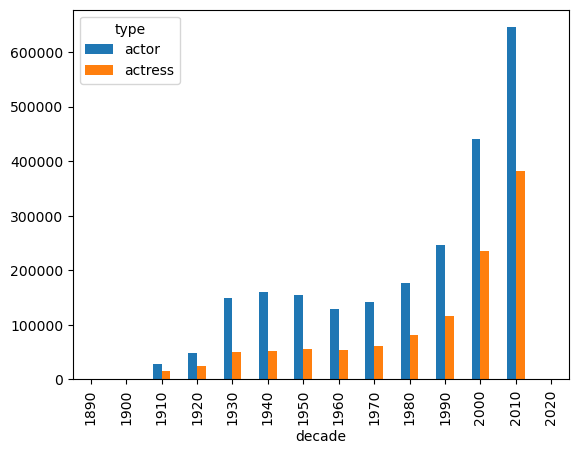

In [64]:
d = cast[cast["type"].isin(["actor","actress"])]
d["decade"] = d["year"]//10*10
d.groupby(["decade","type"]).size().unstack(fill_value=0).plot(kind="bar")
plt.show()

### 21. Determine and comment on the day of the week that movies are released. What is notable about release days and months throughout the year? (Use pd.pivot_table)

In [66]:
release["dow"] = release["date"].dt.day_name()
release["month"] = release["date"].dt.month_name()
pivot = pd.pivot_table(release, index="dow", columns="month", values="title", aggfunc="count", fill_value=0)
pivot

month,April,August,December,February,January,July,June,March,May,November,October,September
dow,,,,,,,,,,,,
Friday,13559,13430,13020,13833,13734,11635,11997,15268,13198,14084,14893,14523
Monday,3168,2844,3240,3138,3699,2267,2337,3383,3050,3371,3551,3161
Saturday,2868,2277,3357,2395,2925,2291,2409,2742,2270,2546,2700,2551
Sunday,1358,1138,1813,1277,1822,894,1031,1228,1165,1342,1423,1332
Thursday,10625,9931,10666,10356,10746,8947,9469,11844,10100,10859,11490,10713
Tuesday,1446,1121,1903,1190,1823,1144,1179,1313,1377,1415,1542,1309
Wednesday,4650,4270,5097,4118,4663,4243,4282,4479,4289,4582,4605,4161


Friday is the most common release day. Studios prefer it so that opening weekends capture maximum audience attention.
Wednesday and Thursday often have mid-week special or international releases.
Very few movies are released on Sunday or Tuesday likely due to lower audience turnout early in the week.

### 22. Can you plot the pivot table? Is the output "correct"? Can you fix it?

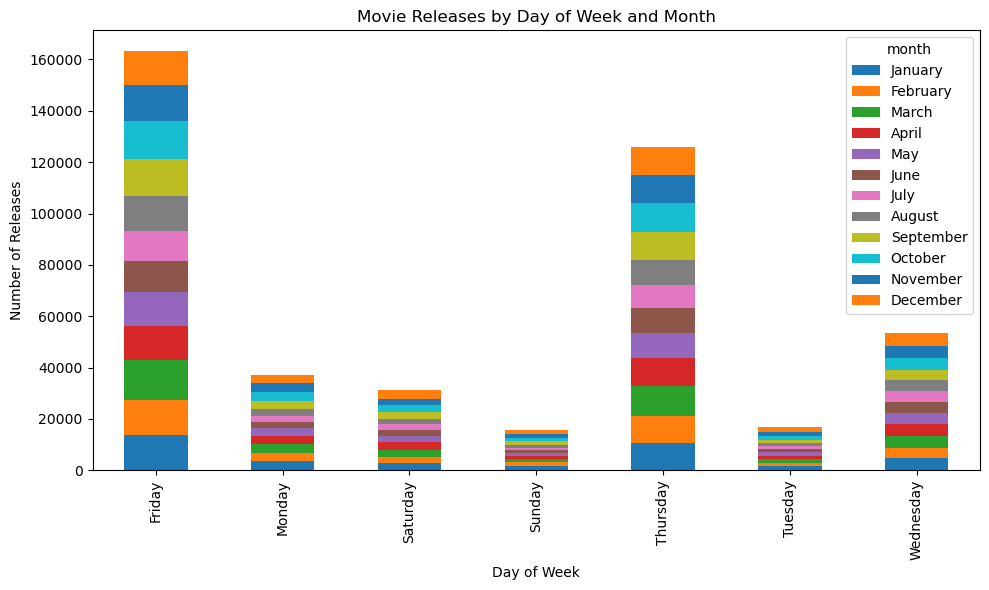

In [71]:
# fixing order of the months
ordered_months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
# reorder columns in pivot table
pivot = pivot.reindex(columns=ordered_months)

# plot the pivot table
pivot.plot(kind="bar", stacked=True, figsize=(10,6), title="Movie Releases by Day of Week and Month")

plt.xlabel("Day of Week")
plt.ylabel("Number of Releases")
plt.tight_layout()
plt.show()
#The original pivot plot looked wrong because months were alphabetical.Fixing the month order makes the seasonal release trend clear. Most movies are released on Fridays, with peaks in summer and at year-end.

### 23. What films did actors in Star Wars go on to appear in? 

In [73]:
sw = cast[cast["title"].str.lower()=="star wars"]
names = sw["name"].unique()
others = cast[(cast["name"].isin(names)) & (cast["title"].str.lower()!="star wars")]
others[["title","year"]].drop_duplicates().head(50)

,title,year
59905,Every Little Crook and Nanny,1972
59906,Linda Lovelace for President,1975
59907,Rogue One,2016
59908,Smorgasbord,1983
59910,The Roommates,1973
59911,The Sting II,1983
59912,The Student Body,1976
59913,The Zebra Force,1976
82403,Adventures of a Plumber's Mate,1978
82404,Adventures of a Private Eye,1977
